## Analyse jährliche CO2-Emission
Gruppe: Jessica Itulah, Michelle Assadi, Medhani Kathirkamanathan

Fragestellung:

Welche Unterschiede und Trends lassen sich in den CO₂-Emissionen pro Kopf ausgewählter Länder über den Zeitraum 2013–2023 identifizieren, und welche Faktoren könnten diese Entwicklungen beeinflusst haben?

Quellen

https://ourworldindata.org/grapher/annual-co2-emissions-per-country
 

## 1. Daten beschaffen und laden

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('annual-co2-emissions-per-country.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Tonnen']) 
df.head() 

,Gebiet,Code,Jahr,Tonnen
0,Afghanistan,AFG,2000,1047127.94
1,Afghanistan,AFG,2001,1069098.00
2,Afghanistan,AFG,2002,1341065.00
3,Afghanistan,AFG,2003,1559679.00
4,Afghanistan,AFG,2004,1237247.00


## 2. Daten vorbereiten

In [22]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Tonnen')
df_pivot.head()

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1047127.94,1069098.0,1341065.0,1559679.0,1237247.0,1889507.0,2159318.0,2799909.0,4254490.0,6.388232e+06,...,9384400.0,8605932.0,9311054.0,10191504.0,10400110.0,11118626.0,9868841.0,10169889.0,10516319.0,10825998.0
Albania,3024926.00,3220656.0,3748272.0,4303499.0,4176684.0,4261413.0,3910715.0,4003596.8,4448339.0,4.369912e+06,...,4712144.0,4555035.0,5343792.0,5194860.0,4940528.0,4865033.0,5137011.0,4498282.0,4417333.0,4444448.0
Algeria,84552456.00,86019190.0,89658400.0,94077930.0,90852530.0,109564424.0,103797760.0,107548696.0,108596090.0,1.163280e+08,...,160321620.0,158308320.0,165251630.0,174461180.0,182425000.0,171138530.0,182035800.0,192778560.0,202846660.0,198203180.0
Andorra,523952.00,523952.0,531280.0,534944.0,564256.0,578912.0,545936.0,538608.0,538608.0,5.166240e+05,...,465328.0,472656.0,472656.0,498304.0,490976.0,377392.0,414032.0,423408.0,418098.0,424663.0
Angola,15995108.00,15908461.0,16080002.0,17484428.0,17015688.0,15386819.0,17144838.0,17587936.0,18750156.0,2.066833e+07,...,27505228.0,25465634.0,23600984.0,23278050.0,22210076.0,16549341.0,19218562.0,21089004.0,21674816.0,22333584.0


## 3. Statistik der Roh-Daten

In [23]:
df.dtypes

Gebiet     object
Code       object
Jahr        int64
Tonnen    float64
dtype: object

### 3.1 Analyse Gebiete

In [24]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  214


In [25]:
df['Gebiet'].value_counts()

Gebiet
Afghanistan          25
Albania              25
Algeria              25
Andorra              25
Angola               25
                     ..
Vietnam              25
Wallis and Futuna    25
Yemen                25
Zambia               25
Zimbabwe             25
Name: count, Length: 214, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

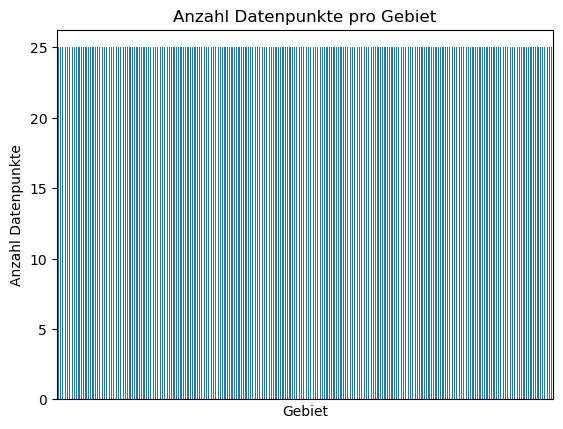

In [26]:
df['Gebiet'].value_counts().plot(kind='bar',
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [27]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  214


In [28]:
df['Code'].value_counts()

Code
AFG    25
ALB    25
DZA    25
AND    25
AGO    25
       ..
VNM    25
WLF    25
YEM    25
ZMB    25
ZWE    25
Name: count, Length: 214, dtype: int64

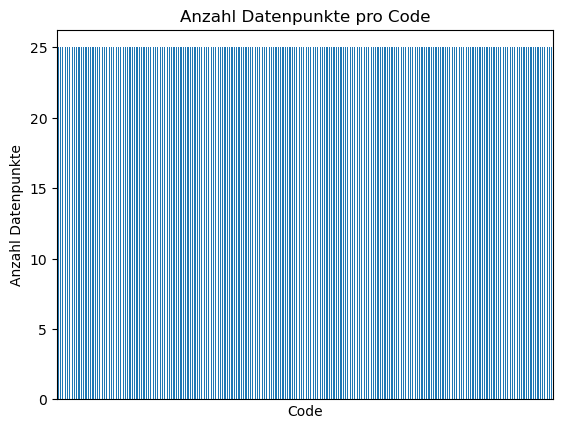

In [29]:
df['Code'].value_counts().plot(kind='bar' ,xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [30]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  25


In [31]:
df['Jahr'].value_counts().sort_index()

Jahr
2000    214
2001    214
2002    214
2003    214
2004    214
2005    214
2006    214
2007    214
2008    214
2009    214
2010    214
2011    214
2012    214
2013    214
2014    214
2015    214
2016    214
2017    214
2018    214
2019    214
2020    214
2021    214
2022    214
2023    214
2024    214
Name: count, dtype: int64

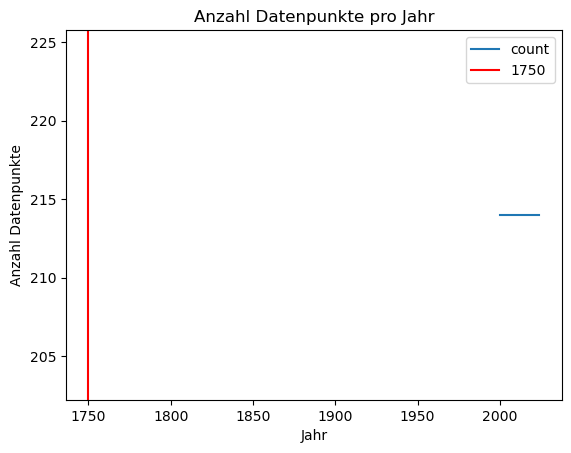

In [32]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1750, color='red',label='1750')
g.legend()

### 3.4 Analyse CO2-Emission

In [33]:
df.describe()

,Jahr,Tonnen
count,5350.000000,5.350000e+03
mean,2012.000000,1.500389e+08
std,7.211777,7.442659e+08
min,2000.000000,0.000000e+00
25%,2006.000000,1.051675e+06
50%,2012.000000,7.816520e+06
75%,2018.000000,5.580939e+07
max,2024.000000,1.228904e+10


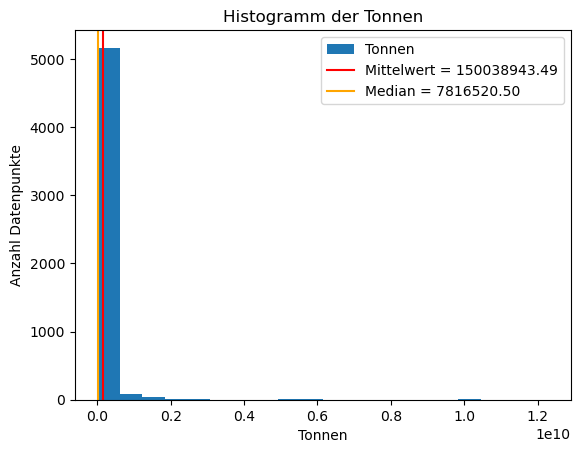

In [34]:
g = df['Tonnen'].plot(kind='hist', bins=20, title='Histogramm der Tonnen',
                           xlabel='Tonnen', ylabel='Anzahl Datenpunkte')
mean = df['Tonnen'].mean()
g.axvline(x=df['Tonnen'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')
 
median = df['Tonnen'].median()
g.axvline(x=df['Tonnen'].median(), color='orange',label=  f'Median = {median:.2f}')
 
g.legend()

## 4. Analyse

### Vorgehen

### Beobachtungen

### Interpretation


### Berechnungen

In [35]:
diffs = df_pivot[2024]-df_pivot[2000]   
diffs = diffs.sort_values().dropna()  
diffs

Gebiet
United States    -1.119038e+09
Germany          -3.266566e+08
Japan            -2.983357e+08
United Kingdom   -2.561281e+08
Italy            -1.676685e+08
                      ...     
Saudi Arabia      3.824944e+08
Iran              4.254179e+08
Indonesia         5.311658e+08
India             2.206413e+09
China             8.645228e+09
Length: 214, dtype: float64

<Axes: title={'center': 'Grösste Differenzen der CO2-Emissions 2000-2024'}, ylabel='Gebiet'>

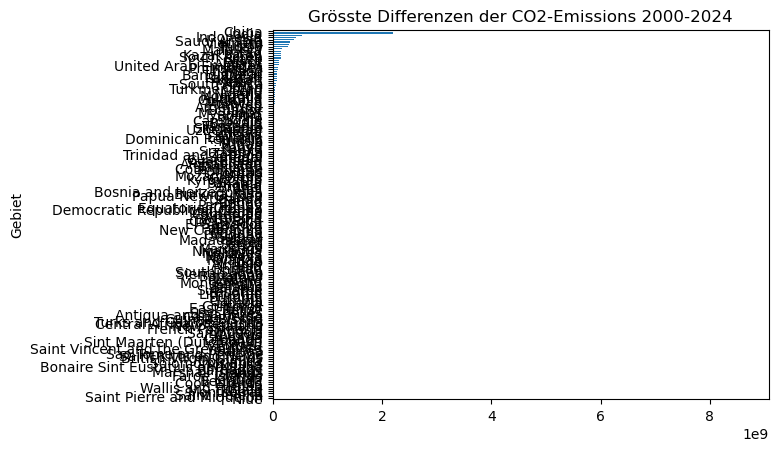

In [66]:
diff_sel = (diffs > 5)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste Differenzen der CO2-Emissions 2000-2024')

In [50]:
Gebiets_liste = diffs[diff_sel].nlargest(5).index.tolist()
print(Gebiets_liste)

['China', 'India', 'Indonesia', 'Iran', 'Saudi Arabia']


### Visualisierung

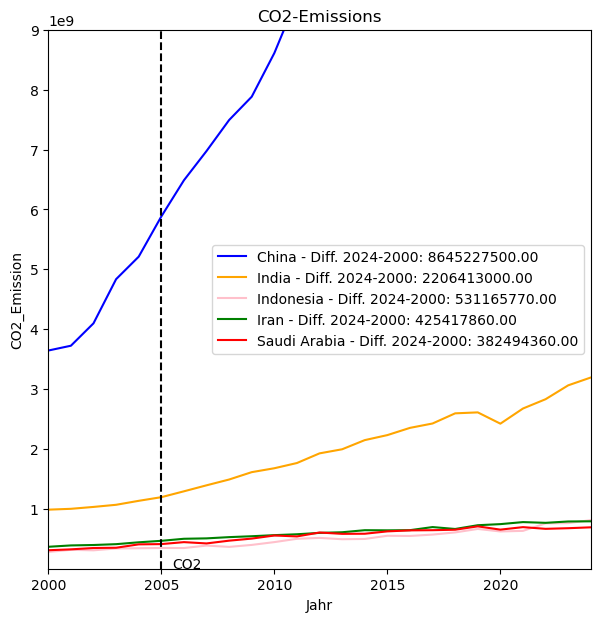

In [ ]:
color_dict = {
    'China': 'blue',
    'India': 'orange',
    'Indonesia': 'pink',
    'Iran': 'green',
    'Saudi Arabia': 'red',
   
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='CO2-Emissions', xlabel='Jahr', ylabel=f'CO2_Emission', legend=True,
                                  label=f'{gebiet} - Diff. 2024-2000: {diff:.2f}', 
                                  xlim=[2000,2024], ylim=[10000000,9000000000],  
                                  color=color_dict[gebiet],        
                                  figsize=(7,7))                  

   



g.axvline(x=2005, color='black', linestyle='--')  
g.text(2005.5, 37, 'CO2');